# 数据可视化

In [12]:
import pandas as pd
df = pd.read_csv("C:\\Users\\jacky_yin\\AppData\\Roaming\\data\\pandas data\\taobao_data.csv")
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


In [13]:
df_mean = df.drop(["卖家","宝贝"],axis = 1).groupby("位置").mean().sort_values("成交量",ascending=False)

In [14]:
df_mean.head()

,价格,成交量
位置,,
江苏,223.611364,7030.909091
上海,161.200000,6801.500000
湖北,254.714286,6182.000000
河北,152.000000,6050.666667
河南,119.000000,5986.000000


matplotlib是python中非常出色的可视化库，能轻松应对大多数画图需求

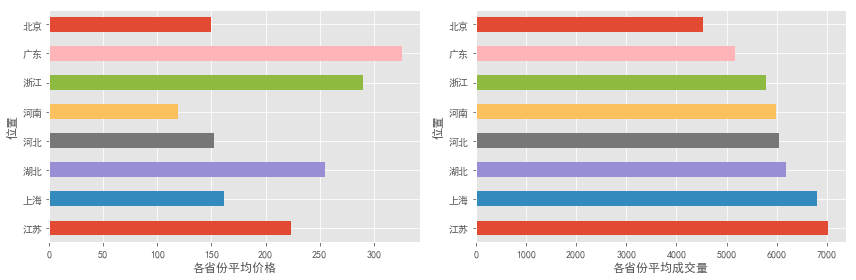

In [15]:
#画出各省份平均价格、各省份成交量柱状图
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")#将画图的背景样式设置成ggplot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))#设定一张名叫fig的画布1x2布局，将画布分成两个小画布ax1，ax2，figsize是设定了fig画布的大小为12x4的点
df_mean.价格.plot(kind='barh',ax=ax1)#画图只需要将数据集后用.plot方法就可以画图了，kind='barh'表示画条形图，ax = ax1表示画在ax1这块小画布上
ax1.set_xlabel("各省份平均价格") #设定x轴标签
df_mean.成交量.plot(kind='barh',ax=ax2)
ax2.set_xlabel("各省份平均成交量")
fig.tight_layout()#自动调整格式

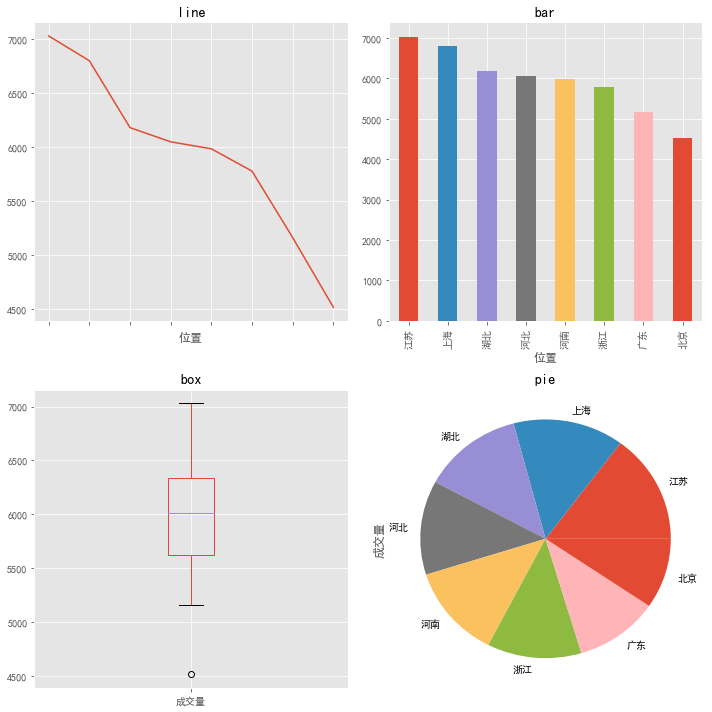

In [16]:
#画出各省份平均成交量折线图、柱状图、箱形图和饼图
fig,axes=plt.subplots(2,2,figsize=(10,10))#2x2形的，10x10点阵大小的画布
s = df_mean.成交量
s.plot(ax=axes[0][0],kind='line',title='line')
s.plot(ax=axes[0][1],kind='bar',title='bar')
s.plot(ax=axes[1][0],kind='box',title='box')
s.plot(ax=axes[1][1],kind='pie',title='pie')
fig.tight_layout()

Text(0,0.5,'成交量')

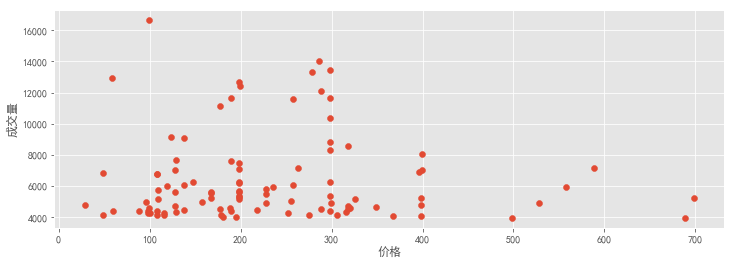

In [17]:
#画出价格与成交量的散点图
#散点图一般用于观察两个度量之间的分布情况，以便研究两者之间的关系。
fig,ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(df.价格,df.成交量)#画散点图的方法和之前的方法不同，之前将图表的类型作为参数；而画散点图的时候，图表的类型作为一种方法，参数是要交叉的两个数据集（度量）
ax.set_xlabel("价格")
ax.set_ylabel("成交量")

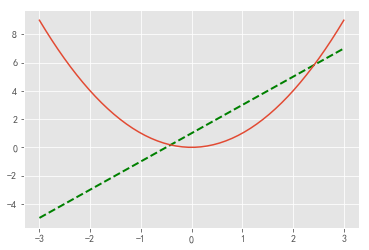

In [18]:
import numpy as np #numpy不能直接使用plot方法，只能通过plt对象调用
plt.rcParams['axes.unicode_minus'] = False #解决负号显示乱码问题
x = np.linspace(-3,3,50)#画一条直线
y = 2*x + 1
plt.figure()#设置一张画布
plt.plot(x,y,color="green",linewidth=2,linestyle='--')
y2 = x**2
plt.plot(x,y2)

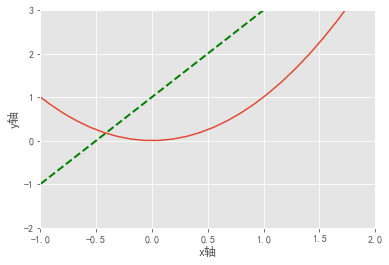

In [19]:
plt.xlim((-1,2))#设定x轴范围为（-1，2）
plt.ylim((-2,3))#设定y轴范围为（-2，3）
plt.xlabel("x轴")
plt.ylabel("y轴")
plt.plot(x,y,color="green",linewidth=2,linestyle='--')
plt.plot(x,y2)

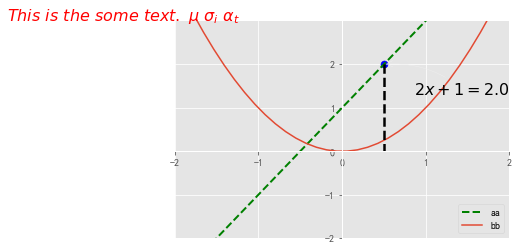

In [20]:
plt.xlim((-1,2))#设定x轴范围为（-1，2）
plt.ylim((-2,3))#设定y轴范围为（-2，3）
#设置X轴和Y轴
new_ticks = np.linspace(-2,2,5)#x轴为-1，2，分为5个数字 -2 ，-1 ，0 ，1 ，2
plt.xticks(new_ticks)
plt.yticks(new_ticks)
ax = plt.gca()
ax.spines["right"].set_color("none")#设置右边框为无色
ax.spines["top"].set_color("none")#设置顶部边框为无色
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position('left')
#设置轴所在的位置
ax.spines['bottom'].set_position(('data',0))
ax.spines["left"].set_position(("data",0))
l1,=plt.plot(x,y,color="green",linewidth=2,linestyle='--')
l2,=plt.plot(x,y2)
plt.legend(handles=[l1,l2],labels=['aa','bb'],loc='best')
#对线上的点进行注解
x0 = 0.5
y0 = 2*x0 + 1
plt.scatter(x0,y0,s=50,color='blue')#将点画出来
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)#画出一条竖直的虚线
plt.annotate(r'$2x+1=%s$'%y0,xy=(x0,y0),xycoords='data',
             xytext=(+30,-30),textcoords='offset points',
             fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
plt.text(-4,3,r'$This\ is\ the\ some\ text.\ \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size':16,'color':'r'})

plt.show()

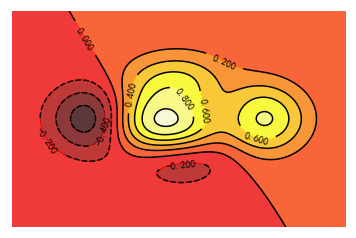

In [21]:
#Contours 等高线图
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    # the height function
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

#用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格: 8表示等高线密度，分成10个高度
X,Y = np.meshgrid(x, y)

# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

# use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
# adding label
plt.clabel(C, inline=True, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

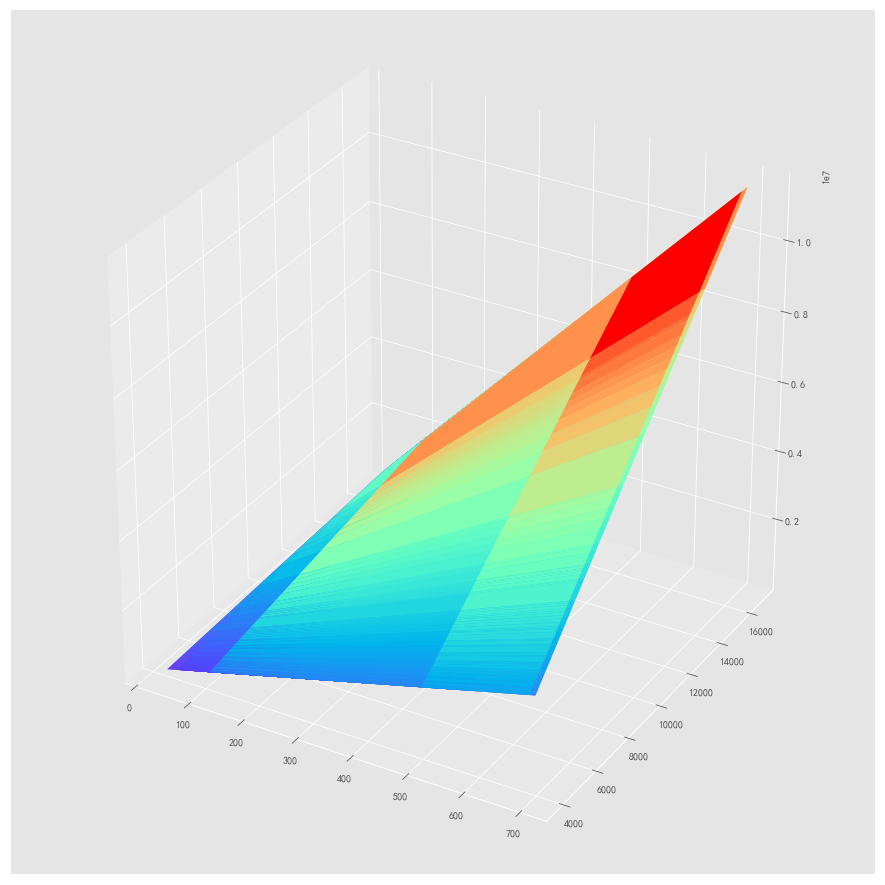

In [22]:
#3D图像
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("C:\\Users\\jacky_yin\\AppData\\Roaming\\data\\pandas data\\taobao_data.csv")
df = df.drop(["卖家","宝贝"],axis = 1)
df["销售额"]=df["价格"]*df["成交量"]

fig,ax = plt.subplots(1,1,figsize=(12,12))
ax = Axes3D(fig)
X = df["价格"]
Y = df["成交量"]
X,Y = np.meshgrid(X,Y)
R = X*Y
ax.plot_surface(X,Y,R,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
#ax.contourf(X,Y,R,zdir="Z",offset=-2,cmap=plt.get_cmap('rainbow'))
#ax.set_zlim(10000,20000)

#df.head()

# pyecharts:Echarts是百度开发的一款开源免费、覆盖各行业图表的纯javaScript的可视化库。
pyecharts是用于生成Echarts图表的类库

In [8]:
import json
from pyecharts import Pie
f = open("C:\\Users\\jacky_yin\\AppData\\Roaming\\data\\pyecharts JSONData\\datas\\pies.json")
data = json.load(f)
name = data['name']
sales = data["sales"]
sales_volume = data["sales_volumn"]

ImportError: cannot import name 'Pie'